In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import json

In [14]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
import plotly.express as px

init_notebook_mode(connected=True)
cf.go_offline()

In [15]:
def corona_morocco() :
   
    url = 'http://www.covidmaroc.ma/'
    page = requests.get(url, )
    soup = BeautifulSoup(page.content, 'html.parser')
    regions = []
    for i in range(2,11) : 
        regions.append(soup.find_all('th')[i].text.replace('\n', '').replace('\u200b\u200b\n', '').replace('\n\u200b','').replace('\u200b',''))

    nombre_cas = []

    for i in range(0,9) : 
        nombre_cas.append(soup.find_all('td')[i].text.replace('\n', '').replace('\u200b\u200b\n', '').replace('\n\u200b','').replace('\u200b',''))
    
    col_names = {'Regions' : regions, 'Nombre de cas' : nombre_cas}    
    corona = pd.DataFrame(col_names)
    corona.set_index('Regions', inplace=True )
    corona['Nombre de cas'] = corona['Nombre de cas'].astype(int)
    plt.figure(figsize=(16,8))
    corona_0 = corona.copy()
    
    sage = requests.get('https://docs.google.com/spreadsheets/d/1lwnfa-GlNRykWBL5y7tWpLxDoCfs8BvzWxFjeOZ1YJk/pubhtml')
    sou = BeautifulSoup(sage.content, 'html.parser')

    country = []
    confirmed = []
    death = []
    for i in np.arange(10,925, 5) :
        country.append(sou.find_all('td')[i].text)
        j=i+1
        confirmed.append(sou.find_all('td')[j].text)
        d = i+2
        death.append(sou.find_all('td')[d].text)

    world = {'Country' : country, 'Confirmed' : confirmed, 'Death' : death}  


    corona_world = pd.DataFrame(world)
    print(corona_world[corona_world['Country'] == 'Morocco' ])
    print(corona_world.head(5))
    corona['Nombre de cas'].iplot(kind='bar',title='covid19', barmode='overlay', orientation='h', colorscale='GnBu', theme='solar' )
    sns.barplot(x=corona.index, y='Nombre de cas', data=corona, orient='v', )



    Country Confirmed Death
78  Morocco        86     3
    Country Confirmed  Death
0     China     81008  3,255
1     Italy    47,021  4,032
2      Iran    20,610   1566
3     Spain    19,980   1002
4  Germany     17,742     48


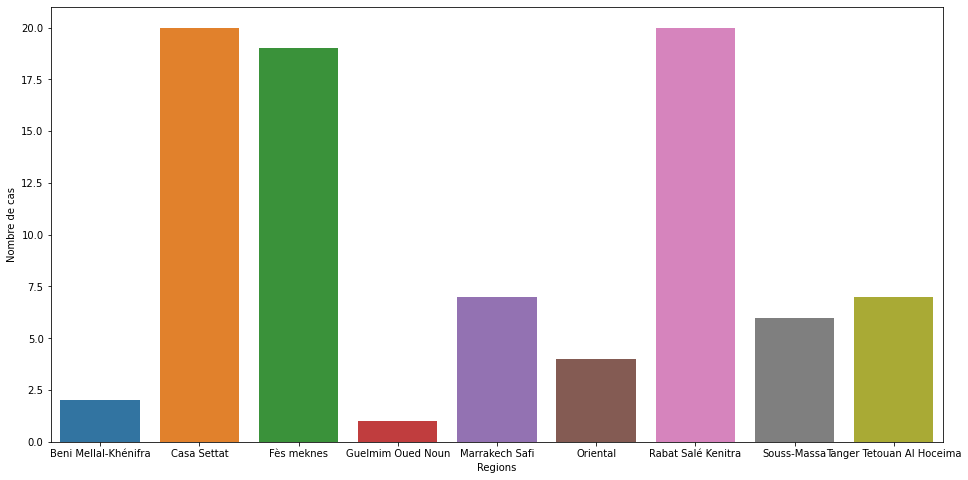

In [16]:
corona_morocco()